In [1]:
# Import pipeline
from transformers import pipeline
import torch

In [6]:
pip show transformers

Name: transformers
Version: 5.1.0
Summary: Transformers: the model-definition framework for state-of-the-art machine learning models in text, vision, audio, and multimodal models, for both inference and training.
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: D:\AI Solution Enablement\huggingface_exp\.env_hf\Lib\site-packages
Requires: huggingface-hub, numpy, packaging, pyyaml, regex, safetensors, tokenizers, tqdm, typer-slim
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip show timm

Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install timm

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.6 MB 2.2 MB/s eta 0:00:01
   ---------------- ----------------------- 1.0/2.6 MB 2.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 2.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from transformers import pipeline

object_detection = pipeline(
    "object-detection",
    model="facebook/detr-resnet-50"
)

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

D:\AI Solution Enablement\huggingface_exp\.env_hf\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vsatmuri\.cache\huggingface\hub\models--facebook--detr-resnet-50. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
The image processor of type `DetrImageProcessor` is now loaded as a fast processor by defaul

In [1]:
pip show timm

Name: timm
Version: 1.0.24
Summary: PyTorch Image Models
Home-page: https://github.com/huggingface/pytorch-image-models
Author: 
Author-email: Ross Wightman <ross@huggingface.co>
License: Apache-2.0
Location: D:\AI Solution Enablement\huggingface_exp\.env_hf\Lib\site-packages
Requires: huggingface_hub, pyyaml, safetensors, torch, torchvision
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [4]:
! pip install matplotlib

  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 21.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 26.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 43.8 MB/s eta 0:00:00
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


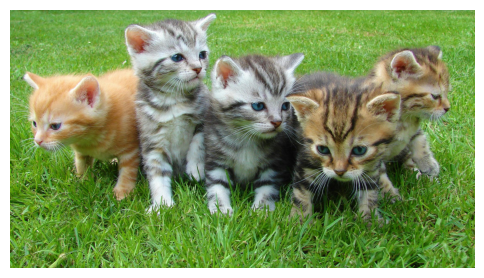

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

cats_img = Image.open("image_1.jpg")

# Display the image using Matplotlib
plt.figure(figsize=(6, 4))
plt.imshow(cats_img)
plt.axis('off')  # Hide the axes
plt.show()

In [7]:
#Pass the image to the object_detection

# Pass the input to the pipeline
detections = object_detection(cats_img)

In [9]:
type(detections)

list

In [14]:
len(detections)

4

In [15]:
detections

[{'score': 0.9655430316925049,
  'label': 'cat',
  'box': {'xmin': 587, 'ymin': 34, 'xmax': 1057, 'ymax': 1047}},
 {'score': 0.989728569984436,
  'label': 'cat',
  'box': {'xmin': 53, 'ymin': 313, 'xmax': 697, 'ymax': 986}},
 {'score': 0.989687979221344,
  'label': 'cat',
  'box': {'xmin': 974, 'ymin': 221, 'xmax': 1526, 'ymax': 1071}},
 {'score': 0.9983605742454529,
  'label': 'cat',
  'box': {'xmin': 1422, 'ymin': 183, 'xmax': 2299, 'ymax': 1114}}]

In [17]:
type(detections[1])

dict

In [21]:
#python function to entract the distinct labels and count of each.

from collections import Counter

def describe_image(detections):
    """
    Generates a natural language description of object counts
    from HuggingFace / DETR detection output.

    Parameters:
        detections (list): List of detection dictionaries

    Returns:
        str: Sentence describing object counts
    """

    # Safety check
    if not detections:
        return "No objects were detected in the image."

    # Count labels
    label_counts = Counter(d['label'] for d in detections)

    # Build sentence parts
    parts = []
    for label, count in label_counts.items():
        # Basic plural handling
        label_text = label + "s" if count > 1 else label
        parts.append(f"{count} {label_text}")

    # Natural sentence formatting
    if len(parts) == 1:
        sentence = f"The image contains {parts[0]}."
    else:
        sentence = (
            "The image contains "
            + ", ".join(parts[:-1])
            + " and "
            + parts[-1]
            + "."
        )

    return sentence


In [22]:
sentence=describe_image(detections)

In [34]:
print(sentence)

The image contains 4 cats.


In [27]:
#task :text into natural speech audio
#model : suno/bark-small

narrator = pipeline(
    task="text-to-speech",
    model="suno/bark-small",
)

config.json: 0.00B [00:00, ?B/s]

D:\AI Solution Enablement\huggingface_exp\.env_hf\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vsatmuri\.cache\huggingface\hub\models--suno--bark-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.1.weight to fine_acoustics.lm_heads.0.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.2.weight to fine_acoustics.lm_heads.1.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.3.weight to fine_acoustics.lm_heads.2.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_l

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

speaker_embeddings_path.json: 0.00B [00:00, ?B/s]

In [52]:
narrated_text = narrator(sentence)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
Both `max_new_tokens` (=768) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both `max_new_tokens` (=60) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Both

In [53]:
type(sentence)

str

In [54]:
print(narrated_text["sampling_rate"])

24000


In [55]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(
    narrated_text["audio"],
    rate=narrated_text["sampling_rate"]
)